<a href="https://colab.research.google.com/github/charithcherry/MLnow_2.0/blob/main/ML_Model/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic disaster survival classification

Kaggle NoteBook : https://www.kaggle.com/pcharith/titanic

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd '/content/drive/MyDrive/ML_now2.0/'

/content/drive/MyDrive/ML_now2.0


In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**[seaborn,matplotlib:data visualization],[pandas,numpy:calculation and data management]**

# DATASET

In [9]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Titanic dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

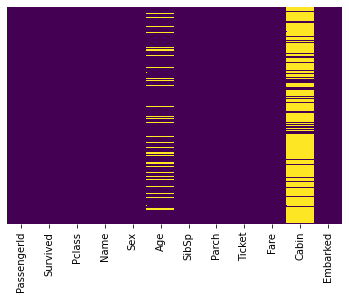

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)


**visualizing null values in the dataframe(dataset)**

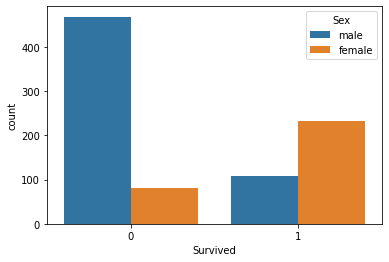

In [14]:
sns.countplot(x='Survived',data=df,hue='Sex')


**plot showing number of passengers survived(1) and dead(0) based on gender**

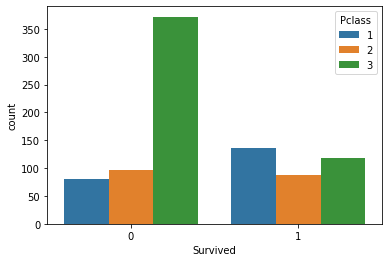

In [15]:
sns.countplot(x='Survived',data=df,hue='Pclass')


plot showing number of passengers survived(1) and dead(0) based on Passenger Class

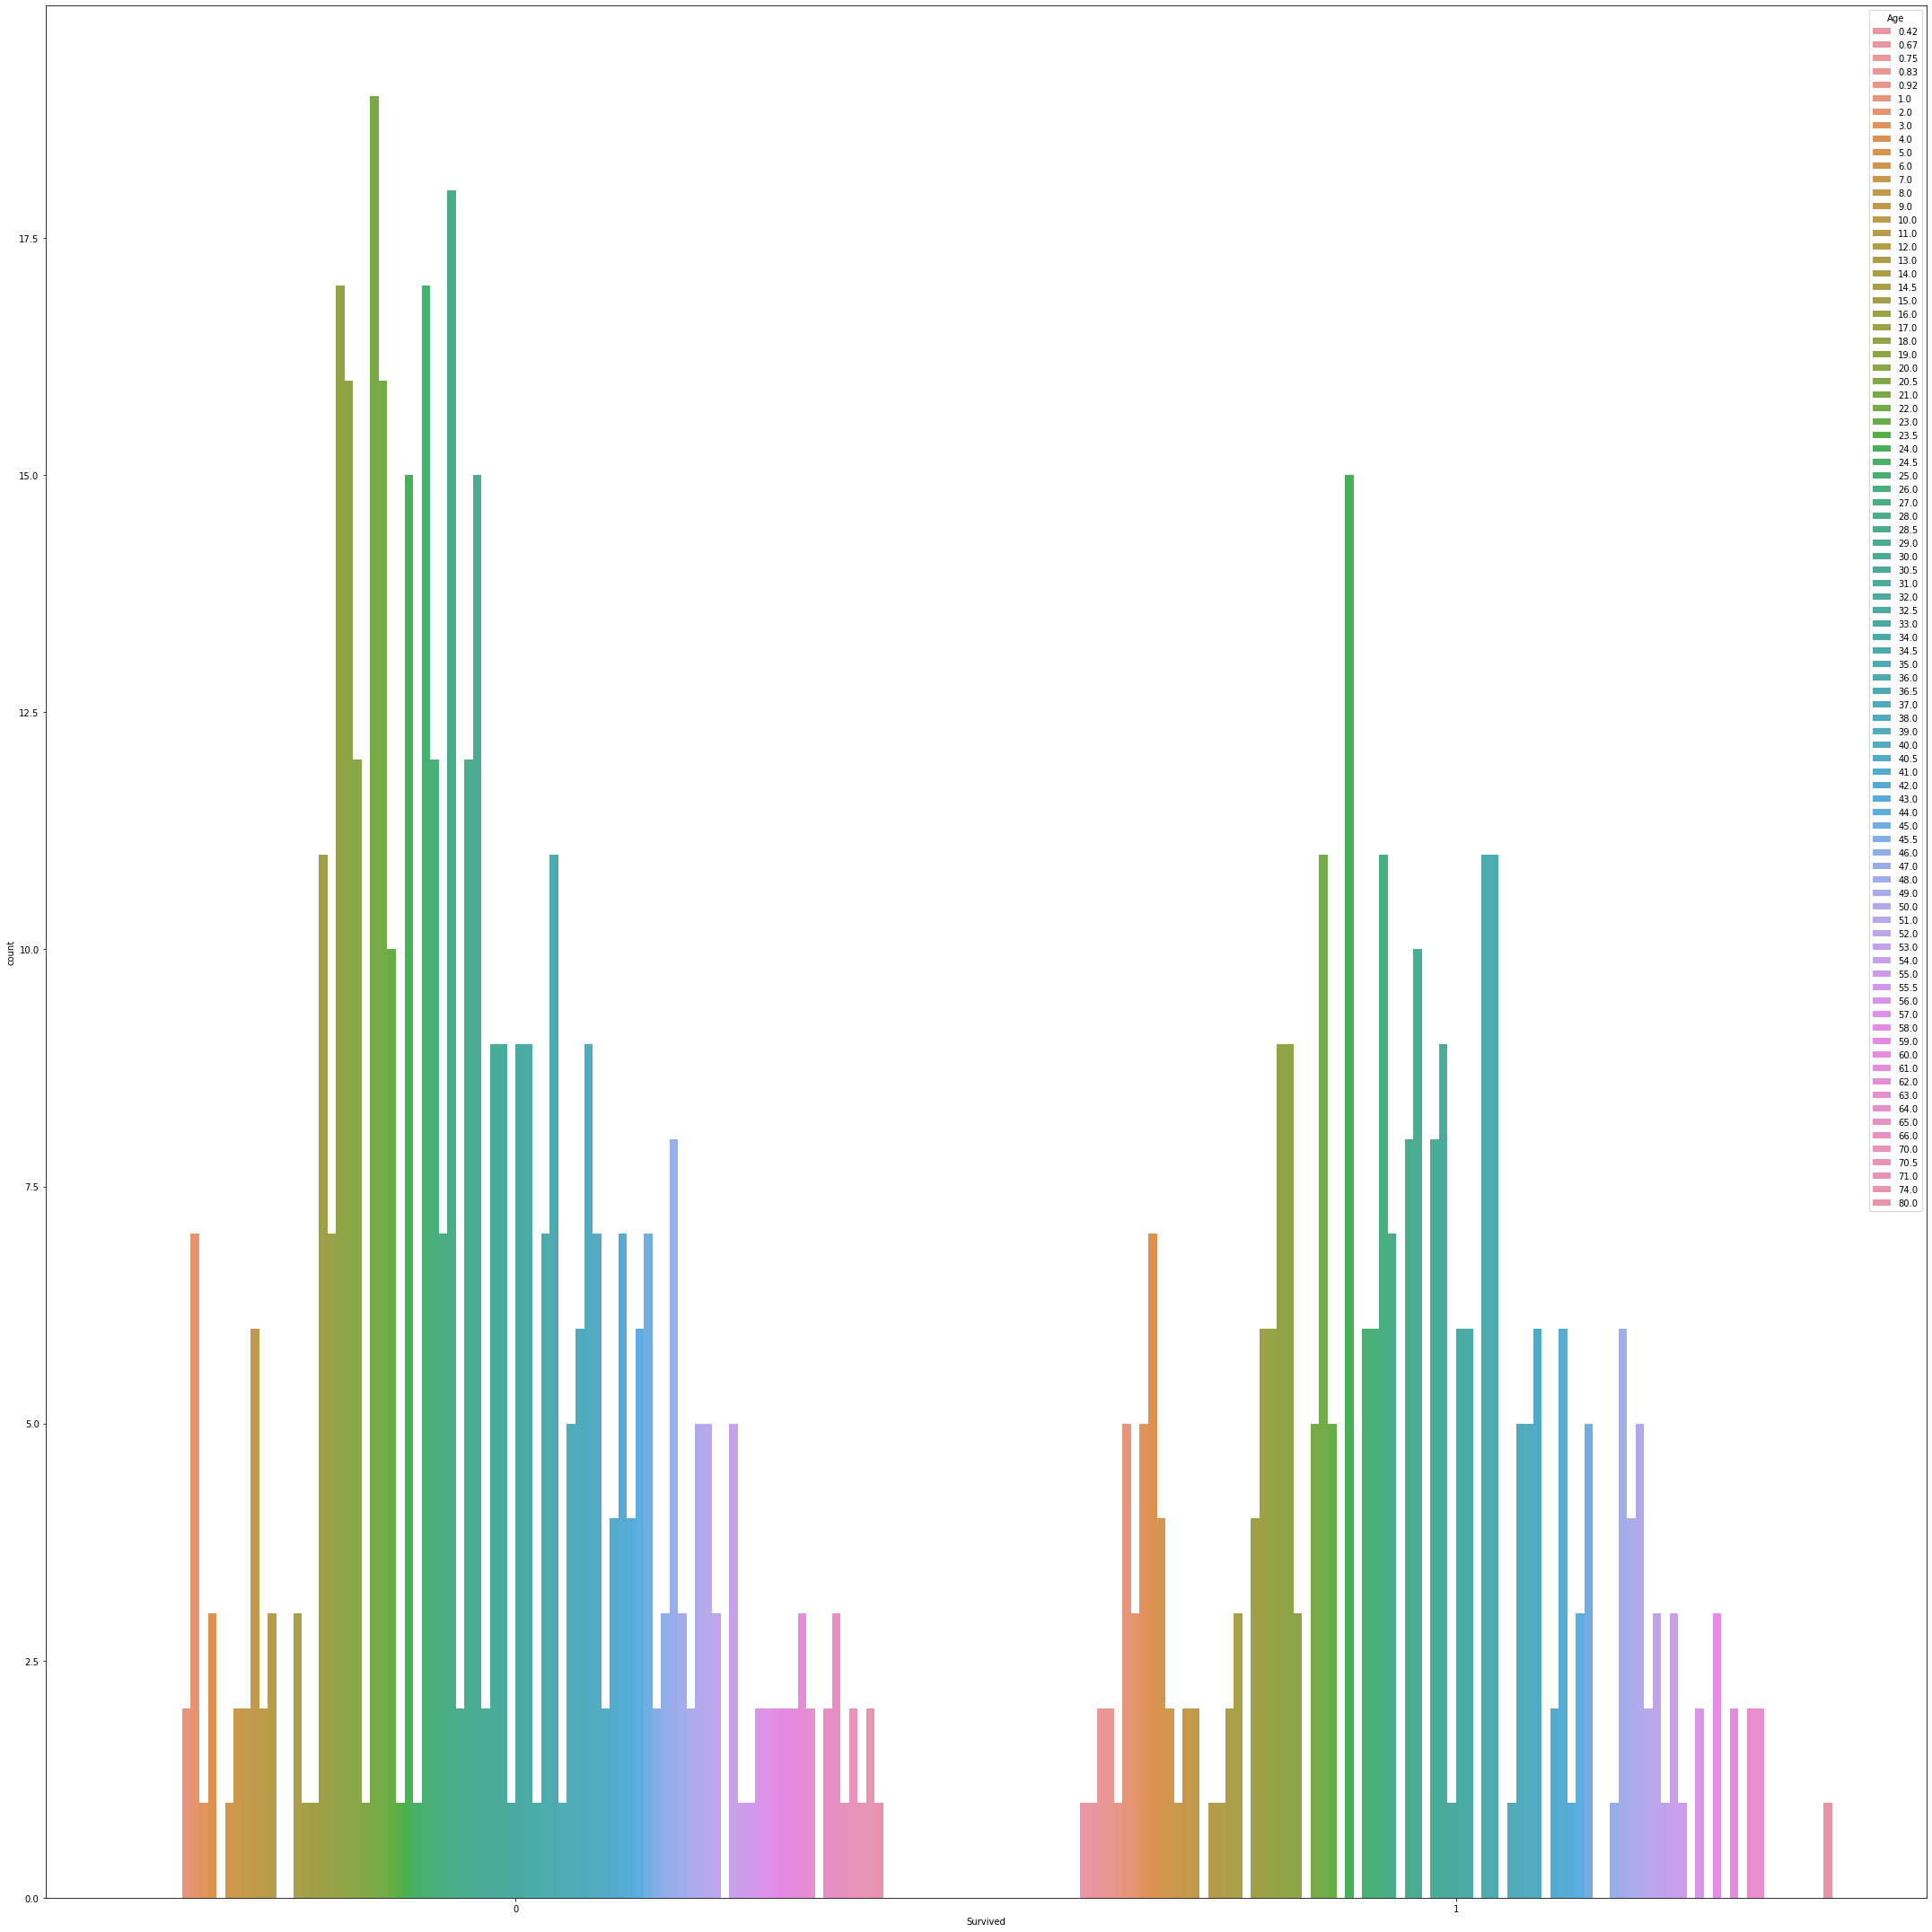

In [16]:
f=plt.figure(figsize=(30,30))
sns.countplot(x='Survived',data=df,hue='Age')
plt.tight_layout()

**plot showing number of passengers survived(1) and dead(0) based on Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


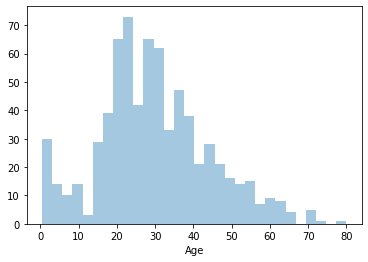

In [17]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30)


**plot showing the age distribution**

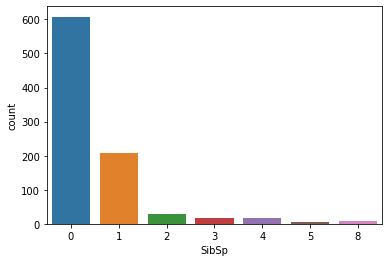

In [18]:
sns.countplot(x='SibSp',data=df)


**plot showing siblings distribution**

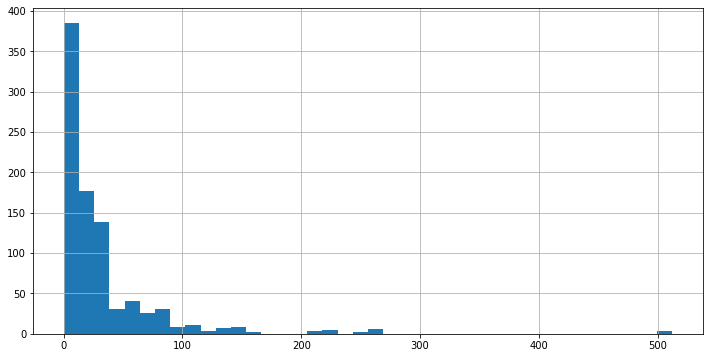

In [19]:
df['Fare'].hist(bins=40,figsize=(12,6))


**plot showing Fare distribution**

# Data Cleaning and Feature Engineering

In [20]:
df.drop(['Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


> **Removing Cabin column since it doesn't contribute in the classification process and also because this column has many null values**

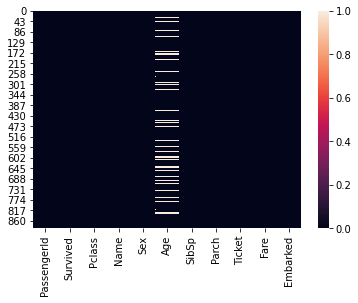

In [21]:
sns.heatmap(df.isnull())


**Null values distribution**

> # Functions for Feature Engineering

In [22]:
def acheck(cols):
    age=cols[0]
    pc=cols[1]
    
    if pd.isnull(age):
        if pc==1:
            return 37
        elif pc==2:
            return 29
        else:
            return 24
        
    else:
        return age
    
def echeck(cols):
    emb=cols[0]
    if emb=='S':
        return 1
    elif emb=='C':
        return 2
    elif emb=='Q':
        return 3
    else:
        return 9
def pcheck(cols):
    par=cols[0]
    if par==0:
        return 0
    elif par==1 or par==2 or par==3 or par==4:
        return 1
    elif par==5 or par==6:
        return 2
    else:
        return 3

In [23]:
df['Age']=df[['Age','Pclass']].apply(acheck,axis=1)

**missing values in Age column are filled using this function: acheck(...)**

In [24]:
df['Embarked']=df[['Embarked']].apply(echeck,axis=1)

**values in Embarked column are converted to numerical values**

In [25]:
df['Parch']=df[['Parch']].apply(pcheck,axis=1)

**values in Parch column are converted to numerical values**

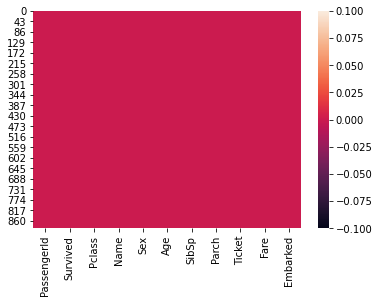

In [26]:
sns.heatmap(df.isnull())


**No Null values**

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


> #        pandas.get_dummies(...)


**Convert categorical variable into dummy/indicator variables**

In [28]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [29]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
Pc=pd.get_dummies(df['Pclass'],drop_first=True)

In [31]:
Pc

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [32]:
df=pd.concat([df,sex,Pc],axis=1)

**Concatenating the dataframe with new numerical columns**

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,1,0,1


In [34]:
y=df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Storing price column for training and testing purpose**

In [35]:
df.drop(['Sex','Ticket','Name','PassengerId','Pclass','Survived'],axis=1,inplace=True)

**Removing categorical columns as they have been replaced by respective numerical columns**

In [36]:
df.head(10)

,Age,SibSp,Parch,Fare,Embarked,male,2,3
0,22.0,1,0,7.2500,1,1,0,1
1,38.0,1,0,71.2833,2,0,0,0
2,26.0,0,0,7.9250,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0
4,35.0,0,0,8.0500,1,1,0,1
5,24.0,0,0,8.4583,3,1,0,1
6,54.0,0,0,51.8625,1,1,0,0
7,2.0,3,1,21.0750,1,1,0,1
8,27.0,0,1,11.1333,1,0,0,1
9,14.0,1,0,30.0708,2,0,1,0


In [37]:
df.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'male', 2, 3], dtype='object')

**Available columns for prediction model**

> # Dataset splitting

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y)

# Building Neural Network Model

In [40]:
from sklearn.neural_network import MLPClassifier

> # Neural Network Model from sklearn

In [41]:
mlp = MLPClassifier(hidden_layer_sizes=(512,), verbose = 1,activation='relu',solver='adam',warm_start=True)

An MLP (or Artificial Neural Network - ANN) with a single hidden layer 

In [42]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(512,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=True)

# Running/Fitting the Models

In [43]:
mlp.fit(X_train, Y_train)

Iteration 1, loss = 0.81114359
Iteration 2, loss = 0.68669798
Iteration 3, loss = 0.63099399
Iteration 4, loss = 0.57800482
Iteration 5, loss = 0.55835707
Iteration 6, loss = 0.55180393
Iteration 7, loss = 0.54794087
Iteration 8, loss = 0.54654389
Iteration 9, loss = 0.53033119
Iteration 10, loss = 0.52228966
Iteration 11, loss = 0.52101077
Iteration 12, loss = 0.53621944
Iteration 13, loss = 0.51784295
Iteration 14, loss = 0.50439272
Iteration 15, loss = 0.49990115
Iteration 16, loss = 0.50652625
Iteration 17, loss = 0.49377412
Iteration 18, loss = 0.49545837
Iteration 19, loss = 0.50465935
Iteration 20, loss = 0.50827046
Iteration 21, loss = 0.49200594
Iteration 22, loss = 0.47930803
Iteration 23, loss = 0.47778281
Iteration 24, loss = 0.47474329
Iteration 25, loss = 0.48630447
Iteration 26, loss = 0.47240814
Iteration 27, loss = 0.47403235
Iteration 28, loss = 0.46788015
Iteration 29, loss = 0.47244838
Iteration 30, loss = 0.47256213
Iteration 31, loss = 0.46024401
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(512,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=True)

# Gathering Predictions from the model

In [44]:

pred=mlp.predict(X_test)
print(pred)


[1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1]


# Accuracy and Classification report

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("accuracy=",accuracy_score(Y_test, pred))
print(classification_report(pred,Y_test))

accuracy= 0.7802690582959642
              precision    recall  f1-score   support

           0       0.91      0.75      0.83       155
           1       0.60      0.84      0.70        68

    accuracy                           0.78       223
   macro avg       0.76      0.80      0.76       223
weighted avg       0.82      0.78      0.79       223



In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [47]:
import math
numFeatures = len(X_train.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

6


In [48]:
model1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),#input layer
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'), #only hidden layer should be more than 1 
                             tf.keras.layers.Dense(1, activation='sigmoid') #output layer
])

In [49]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [51]:
numEpochs = 500
history = model1.fit(X_train, Y_train, epochs=numEpochs,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/500
21/21 [==============================] - 1s 12ms/step - loss: 3.5359 - accuracy: 0.3698 - val_loss: 2.1957 - val_accuracy: 0.4215
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 1.8497 - accuracy: 0.5299 - val_loss: 1.3224 - val_accuracy: 0.6637
Epoch 3/500
21/21 [==============================] - 0s 3ms/step - loss: 1.3235 - accuracy: 0.6856 - val_loss: 1.1262 - val_accuracy: 0.6906
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 1.0749 - accuracy: 0.6841 - val_loss: 0.9334 - val_accuracy: 0.6816
Epoch 5/500
21/21 [==============================] - 0s 2ms/step - loss: 0.8822 - accuracy: 0.6886 - val_loss: 0.7872 - val_accuracy: 0.6682
Epoch 6/500
21/21 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.6886 - val_loss: 0.7087 - val_accuracy: 0.6323
Epoch 7/500
21/21 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6931 - val_loss: 0.7114 - val_accuracy: 0.6323
Epoch 8/500


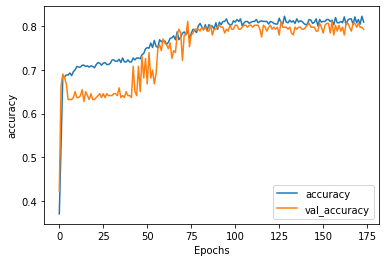

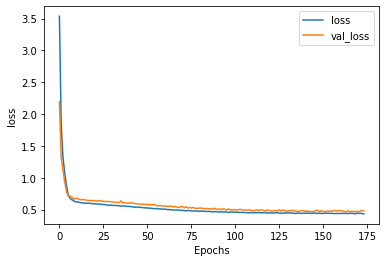

In [52]:
def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


pltGr(history, 'accuracy')
pltGr(history, 'loss')

In [53]:
testPreds = model1.predict(X_test)

In [54]:
def errorPlot(labels, preds, binVal):
  err = preds - labels
  plt.hist(err, bins=binVal)
  plt.xlabel('Prediction-Error')
  plt.ylabel('Count')
  plt.show()

In [55]:
Y_test

299    1
839    1
591    1
566    0
351    0
      ..
53     1
315    1
337    1
128    1
275    1
Name: Survived, Length: 223, dtype: int64

In [56]:
t=testPreds.flatten()
list(t)

[0.99592793,
 0.4648197,
 0.92299336,
 0.07793003,
 0.37643975,
 0.1414068,
 0.2922981,
 0.25351542,
 0.074146956,
 0.2488215,
 0.069565415,
 0.8839369,
 0.26959217,
 0.093237996,
 0.07588121,
 0.08150774,
 0.69582456,
 0.9520323,
 0.31666088,
 0.5233302,
 0.30566067,
 0.22182766,
 0.5889713,
 0.08269414,
 0.04998684,
 0.7332982,
 0.0638448,
 0.7586024,
 0.20277038,
 0.7660903,
 0.47876722,
 0.06819457,
 0.47637737,
 0.20277038,
 0.11522949,
 0.08064845,
 0.07499555,
 0.7580581,
 0.75192964,
 0.025206745,
 0.40412846,
 0.17049724,
 0.07352474,
 0.54019976,
 0.18829316,
 0.06885016,
 0.79600567,
 0.074753135,
 0.102507144,
 0.94359493,
 0.07529679,
 0.6673849,
 0.07289389,
 0.7611584,
 0.76581764,
 0.07449946,
 0.09083384,
 0.3521265,
 0.0517852,
 0.17712593,
 0.7712065,
 0.067959845,
 0.07338351,
 0.4919146,
 0.3119805,
 0.07614645,
 0.562107,
 0.7988157,
 0.903368,
 0.7880916,
 0.59841037,
 0.68495464,
 0.66938186,
 0.075867176,
 0.48736548,
 0.111756,
 0.17622331,
 0.43492204,
 0.758

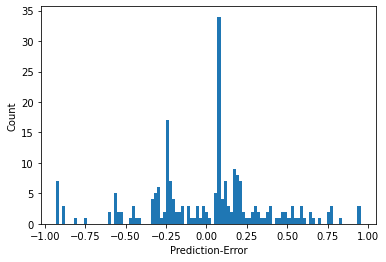

In [57]:
errorPlot(Y_test, t, 100)

In [58]:
te = []
for x in t:
  if x >= 0.5:
    te.append(1)
  else:
    te.append(0)

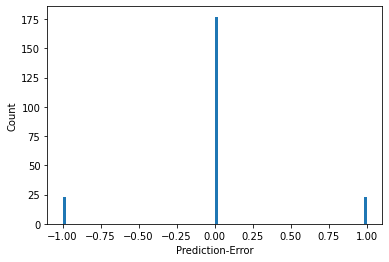

In [59]:
errorPlot(Y_test, te, 100)